<a href="https://colab.research.google.com/github/MoritzLaurer/transformers-workshop-comptext-2023/blob/master/overview_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Transformers and ease-of-use

📅 _COMPTEXT 2023 tutorial, 11.05.2023_

👨‍🏫 By [Moritz Laurer](https://twitter.com/MoritzLaurer). 
For questions, reach out to: m.laurer@vu.nl

**Section structure**
1. The open-source ecosystem: democratisation of ML software and hardware
2. Some simple code demonstrations
3. Q&A / Discussion

**Initial questions:** 
* Who has heard of Hugging Face? 
* Who has used Hugging Face Transformers?
* Who has used Google Colab?

* Who has beginner knowledge or more in R?
* Who has beginner knowledge or more in Python?
* Who has worked with text-as-data methods before?

## 1. The open-source ML ecosystem, or the democratisation of ML software & hardware

### 1.1. What does the ML open-source ecosystem look like in early 2023?

A key driver for progress in AI is the open-source community. Prominent example: [Hugging Face](https://huggingface.co) is the main platform for sharing ML models.
* Their [Transformers library](https://huggingface.co/transformers/) provides easy-to-use code for using state-of-the-art (SOTA) transformer models.
* Their [model hub](https://huggingface.co/models) provides 200.000~ models trained by NLP researchers - from universities, small companies or large companies like Microsoft, Facebook, Google.
* Their [Datasets library](https://huggingface.co/datasets) provides 32.000~ textual datasets.

=> They are the de-facto open-source standard for sharing and using transformer language models. (Besides PyTorch and TensorFlow)

=> Let's look at the website (model hub, tasks & model cards): https://huggingface.co/

### 1.2. How do people access ML hardware in 2023?


Several providers for cheap access to GPUs exist. A prominent example is Google Colaboratory ("Colab"), a programming environment which enables you to run code in the browser. The main advantages are:
* No setup on your local machine is required. Everything runs in the cloud. 
* Free access to GPUs
* Easy sharing of code and text. See an introduction [here](https://colab.research.google.com/notebooks/intro.ipynb?utm_source=scs-index). 

Colab is based on [Jupyter Notebooks](https://jupyter.org/) and has two main types of cells: 
* code cells
* text cells

## 2. Demonstration of how simple using Transformers has become today


**Overview of different tasks that can be automated with ML**
* Key ingredients: (1) a model trained on a specific task; (2) input data (e.g. texts or images); (3) output produced by the model.
* Transformers are currently the most popular type of deep learning algorithm. Most tasks below are solved with Transformers. There might be other types of algorithms coming up in the medium term. 



#### Install the Transformers library & dependencies

In [1]:
!pip install transformers~=4.26.1  # The Transformers library from HuggingFace
!pip install sentencepiece==0.1.96  # optional tokeniser, required for some models. e.g. machine translation
!pip install wikipedia==1.4.0  # to download any text from wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=fb3beaa663657ee747026ce3fb7f7b7088f3280551aed9ba4b30ffde1cfa066e
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
# automatically chose CPU or GPU for inference, depending on your hardware
import torch
device_id = torch.cuda.current_device() if torch.cuda.is_available() else -1    # -1 == CPU ; 0 == GPU
#device_id = -1  # can use CPU for this tutorial to avoid GPU errors

**The Hugging Face Pipeline**
* Makes automation of many NLP tasks possible in 3 lines of code
* Detailed documentation is available [here](https://huggingface.co/transformers/main_classes/pipelines.html)

In [3]:
from transformers import pipeline  # available pipelines: https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.task
import pandas as pd

### 2.1 Working with text data


### 2.1.1 Text classification

In [4]:
pipeline_zeroshot_classification = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:446: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [7]:
text = "I have not received my reimbursement yet. What the hell is going on?"
classes = ['payment issues', 'travel advice', 'bug report']

#text = "I do not think the government is trustworthy anymore. We need to mobilize and resist!"
#classes = ["civil disobedience", "praise of the government", "travel adivce"]

output = pipeline_zeroshot_classification(text, classes, multilabel=True)

pd.DataFrame(data=[output["labels"], output["scores"]], index=["class", "probability"]).T


class probability
0        civil disobedience    0.596292
1             travel adivce    0.274983
2  praise of the government    0.128725

### 2.1.2 Machine Translation

* Open source machine translation (MT) models enable you to translate between many different languages without Google Translate.
* [University of Helsinki](https://huggingface.co/Helsinki-NLP) uploaded models for more than 1000 language pairs to the Hugging Face hub
* [Facebook AI](https://huggingface.co/models?search=facebook+m2m) open-sourced several multi-lingual models
* The [EasyNMT library](https://github.com/UKPLab/EasyNMT), provides an easy wrapper for all these models
* Most machine translation models translate between two languages in one direction (e.g. German to English, but not English to German), some can translate in multiple directions.


In [8]:
# translation pipeline docs: https://huggingface.co/transformers/main_classes/pipelines.html#transformers.TranslationPipeline
pipeline_translate = pipeline("translation", model="facebook/m2m100_418M", device=device_id)

In [11]:
text = "Ich bin ein Fisch"
pipeline_translate(text, src_lang="de", tgt_lang="en")

[{'translation_text': 'I am a fish'}]

In [10]:
# download any text from wikipedia, via  https://pypi.org/project/wikipedia/
import wikipedia 
wikipedia.set_lang("de")

text = wikipedia.summary("Donald Trump").replace('\n', ' ')[:318]
print(f"Original text:\n{text}\n")

# translate the text from wikipedia
text_translated = pipeline_translate(text, src_lang="de", tgt_lang="en")
print(f"Translated text:\n{text_translated[0]['translation_text']}")


Original text:
Donald John Trump [ˈdɑn.əld dʒɑn tɹɐmp] (* 14. Juni 1946 in Queens, New York City, New York) ist ein US-amerikanischer Unternehmer, Entertainer und Politiker der Republikanischen Partei. Er war von 2017 bis 2021 der 45. Präsident der Vereinigten Staaten. Trump ist Inhaber des Mischkonzerns The Trump Organization und 

Translated text:
Donald John Trump [ˈdɑn.əld dʒɑn tɔmp] (* 14 June 1946 in Queens, New York City, New York) is an American entrepreneur, entertainer and politician of the Republican Party. he was from 2017 to 2021 the 45th President of the United States.


### 2.1.3 Text Summarization

In [12]:
# docs for summarisation pipeline: https://huggingface.co/transformers/main_classes/pipelines.html#summarizationpipeline
pipeline_summarize = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", device=device_id)  # sshleifer/distilbart-cnn-12-6 , google/pegasus-cnn_dailymail

In [13]:
# download any long text from wikipedia, via  https://pypi.org/project/wikipedia/
import wikipedia
wikipedia.set_lang("en")

text_long = wikipedia.summary("Donald Trump").replace('\n', ' ')
print(f"Original text:\n{text_long}\n")

# translate the text from wikipedia
text_summarized = pipeline_summarize(text_long, min_length=5, max_length=30)
print(f"Summarized text:\n{text_summarized[0]['summary_text']}")

Original text:
Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who served as the 45th president of the United States from 2017 to 2021. Trump graduated from the Wharton School with a bachelor's degree in 1968. He became president of his father's real estate business in 1971 and renamed it the Trump Organization. He expanded its operations to building and renovating skyscrapers, hotels, casinos, and golf courses and later started side ventures, mostly by licensing his name. From 2004 to 2015, he co-produced and hosted the reality television series The Apprentice. Trump and his businesses have been involved in more than 4,000 state and federal legal actions, including six bankruptcies. Trump's political positions have been described as populist, protectionist, isolationist, and nationalist. He won the 2016 presidential election as the Republican nominee against Democratic nominee Hillary Clinton despite losing the popular vote. He was 

### 2.1.4 Classical Text Generation

In [ ]:
pipeline_generation = pipeline("text-generation", model="gpt2", device=device_id)  

In [ ]:
prompt = "Barack Obama and deep state bureaucrats are going to "
output = pipeline_generation(prompt, max_length=100, num_return_sequences=5)

pd.DataFrame(data=output)

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


generated_text
0  Barack Obama and deep state bureaucrats are go...
1  Barack Obama and deep state bureaucrats are go...
2  Barack Obama and deep state bureaucrats are go...
3  Barack Obama and deep state bureaucrats are go...
4  Barack Obama and deep state bureaucrats are go...

### 2.1.5 Zero-shot learning with large generative models and prompts (LLMs)

In [14]:
# running large models with accelerate https://huggingface.co/blog/accelerate-large-models
!pip install accelerate==0.16

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 5.3 MB/s eta 0:00:00


In [15]:
# info on GPU
!nvidia-smi
# info on available ram
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('\n\nYour runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Tue May  9 14:14:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |   4383MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# connecting to my google drive to load a 44 GB model from disk instead of downloading it 
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=False)

print(os.getcwd())
os.chdir("/content/drive/My Drive/PhD/generative-models")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/PhD/generative-models


In [4]:
from transformers import pipeline
import torch
#print(torch.__version__)
# float optimization: torch_dtype=bfloat16 / float16 / load_in_8bit=True
model_name = "flan-t5-xl" #"google/flan-t5-xxl"  # bigscience/T0pp, bigscience/T0_3B, google/flan-t5-xl, allenai/tk-instruct-3b-def, allenai/tk-instruct-large-def-pos

In [5]:
# if this doesn't work, try restarting the runtime
pipeline_zeroshot_prompting = pipeline(
    "text2text-generation",  # "text2text-generation", "text-generation"
    model=model_name,  device_map="auto",  #device=device_id,
    torch_dtype=torch.bfloat16,  #load_in_8bit=True,
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
## text classification (framed as multiple choice)
text = '''
Here is a quote: 
"I do not think the government is trustworthy anymore. We need to mobilize and resist!". 
Is this quote about either (a) "civil disobedience", or (b) "praise of the government", or (c) "government funded mobility"? 
Only choose one of the three options.'''

output = pipeline_zeroshot_prompting(text)
output

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1359: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


[{'generated_text': '(a)'}]

In [7]:
## question answering
text = '''Here is a news article from Thursday 22.12.2022: "
European Parliament website hit by cyberattack after Russian terrorism vote
One official blamed pro-Russian hacking group Killnet for the DDoS attack.
The European Parliament website on Wednesday faced a "sophisticated" cyberattack disrupting its services moments after members voted to declare Russia a state sponsor of terrorism.
"I confirm that the Parliament has been subject to an external cyber attack, but the Parliamentary services are doing well to defend the Parliament," Dita Charanzová, Czech MEP and Parliament vice president responsible for cybersecurity, said in a statement.
Another senior Parliament official, requesting not to be named, said “it might be the most sophisticated attack that the Parliament has known so far.”
The attack is what's known as a distributed denial-of-service (DDoS) attack, in which massive amounts of traffic are sent to servers in an attempt to block internet users from accessing websites, Marcel Kolaja, European Parliament member for the Czech Pirate party, confirmed.
DDoS attacks are used by hacking groups to disrupt and cause chaos. It emerged as a favorite instrument of Russian hacking groups like Killnet, notably as a way to protest against political decisions in European countries to support Ukraine in the war.
The attack on the European Parliament website comes after the chamber voted on Wednesday to adopt a resolution declaring Russia a state sponsor of terrorism because of Moscow’s strikes on civilian targets in Ukraine.
"We have a strong indication that it is from Killnet, the hackers with links to Russia indeed. This is my information, but it is under control. It only cut the external access to the Parliament's website ... Unless there is extra attacks we expect it to be back and accessible very soon," said Eva Kaili, Greek member and vice president of the European Parliament.
"This morning Russia was still designated as a terrorist state in an official resolution. This afternoon the entire network collapses in [the European Parliament]," Alexandra Geese, German Greens' MEP, tweeted.
".

'''

prompt_lst = [
    "Was there a cyber attack? Yes or no.", 
    "What is the name of the attacker?",
    "Which country does the attacker come from?",
    "What is the name of the victim of the cyber attack?",
    "Which country does the victim of the cyber attack come from?",
    "If there was a cyber attack, what type of cyber attack was it?",
    "What was the date of the cyber attack?",
    "What or who is the source of information on the cyber attack?",
    "What damages were caused by the cyber attack?",
    "What was the political response to the cyber attack?",
    'How certain is it that there was a cyber attack? "Very certain", "moderately certain", or "not certain"? Chose one of these options.'
]

# chain-of-thought tests https://arxiv.org/pdf/2210.11416.pdf
instructions_begin = ""  #"Answer the following question by reasoning step-by-step: "
instructions_end = ""  #" Explain the answer with step-by-step reasoning"
other_category = ' Answer "unknown" if the correct answer is not explicitly mentioned in the article.'

input_lst = [text + instructions_begin + prompt + other_category + instructions_end for prompt in prompt_lst]

output_lst = []
for input, prompt in zip(input_lst, prompt_lst):
    output = pipeline_zeroshot_prompting(input)
    output_lst.append(output)
    print(f'{prompt:90}{output[0]["generated_text"]}')


Was there a cyber attack? Yes or no.                                                      Yes
What is the name of the attacker?                                                         Killnet
Which country does the attacker come from?                                                Russia
What is the name of the victim of the cyber attack?                                       European Parliament
Which country does the victim of the cyber attack come from?                              unknown
If there was a cyber attack, what type of cyber attack was it?                            distributed denial-of-service (DDoS) attack
What was the date of the cyber attack?                                                    Wednesday
What or who is the source of information on the cyber attack?                             Eva Kaili
What damages were caused by the cyber attack?                                             unanswerable
What was the political response to the cyber attack?              

In [8]:
## text summarisation
text = """
"Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who served as the 45th president of the United States from 2017 to 2021. 
Trump graduated from the Wharton School of the University of Pennsylvania with a bachelor's degree in 1968. He became president of his father's real estate business in 1971 and renamed it The Trump Organization. 
He expanded the company's operations to building and renovating skyscrapers, hotels, casinos, and golf courses. He later started side ventures, mostly by licensing his name. From 2004 to 2015, he co-produced 
and hosted the reality television series The Apprentice. Trump and his businesses have been involved in more than 4,000 state and federal legal actions, including six bankruptcies. Trump's political positions 
have been described as populist, protectionist, isolationist, and nationalist. He won the 2016 United States presidential election as the Republican nominee against Democratic nominee Hillary Clinton despite l
osing the national popular vote. He became the first U.S. president with no prior military or government service. His election and policies sparked numerous protests. The 2017–2019 special counsel investigation 
led by Robert Mueller established that Russia interfered in the 2016 election to favor the election of Trump. Trump promoted conspiracy theories and made many false and misleading statements during his campaigns 
and presidency, to a degree unprecedented in American politics. Many of his comments and actions have been characterized as racially charged or racist, and many as misogynistic. Trump ordered a travel ban 
on citizens from several Muslim-majority countries, diverted military funding towards building a wall on the U.S.–Mexico border, and implemented a policy of family separations for apprehended migrants. 
He rolled back more than 100 environmental policies and regulations in an aggressive attempt to weaken environmental protections."
Please summarize this text by providing the key information about Donald Trump. Summary: 
"""

output = pipeline_zeroshot_prompting(text)
output

[{'generated_text': '"Donald Trump (born June 14, 1946) is an American politician, media personality,'}]

### 2.2 Working with image data

### 2.2.1 Image generation

In [ ]:
# overview https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-gtje5hlt
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-gtje5hlt
  Resolved https://github.com/huggingface/diffusers.git to commit a66f2baeb782e091dde4e1e6394e46f169e5ba58
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 48.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.12.0.dev0-py3-none-any.whl size=606524 sha256=4f9aa445b32fa2f7782bd2b2792565d190fbb66b055ee66353731af4e16c98d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-ugtqxf8e/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3

In [ ]:
# https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch

model_id = "stabilityai/stable-diffusion-2-1"
pipeline_image_generation = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline_image_generation.scheduler = DPMSolverMultistepScheduler.from_config(pipeline_image_generation.scheduler.config)
pipeline_image_generation = pipeline_image_generation.to("cuda")


Downloading:   0%|          | 0.00/539 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/633 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/939 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

**Simple code for generating a single image**

  0%|          | 0/50 [00:00<?, ?it/s]

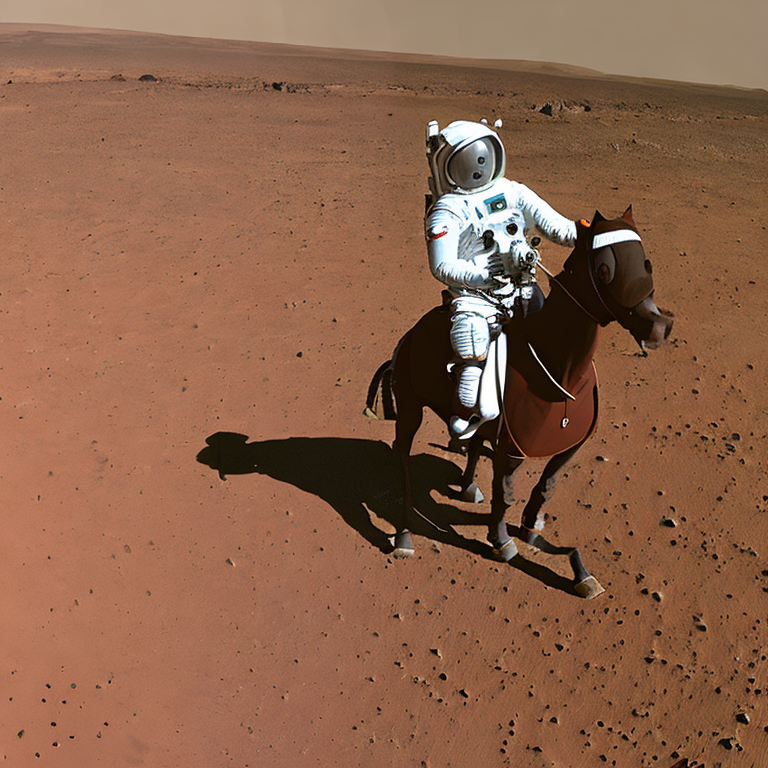

In [ ]:
## simple version for one image
prompt = "A photo of an astronaut riding a horse on mars"
image = pipeline_image_generation(prompt).images
image[0]

**Code for generating multiple images**

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

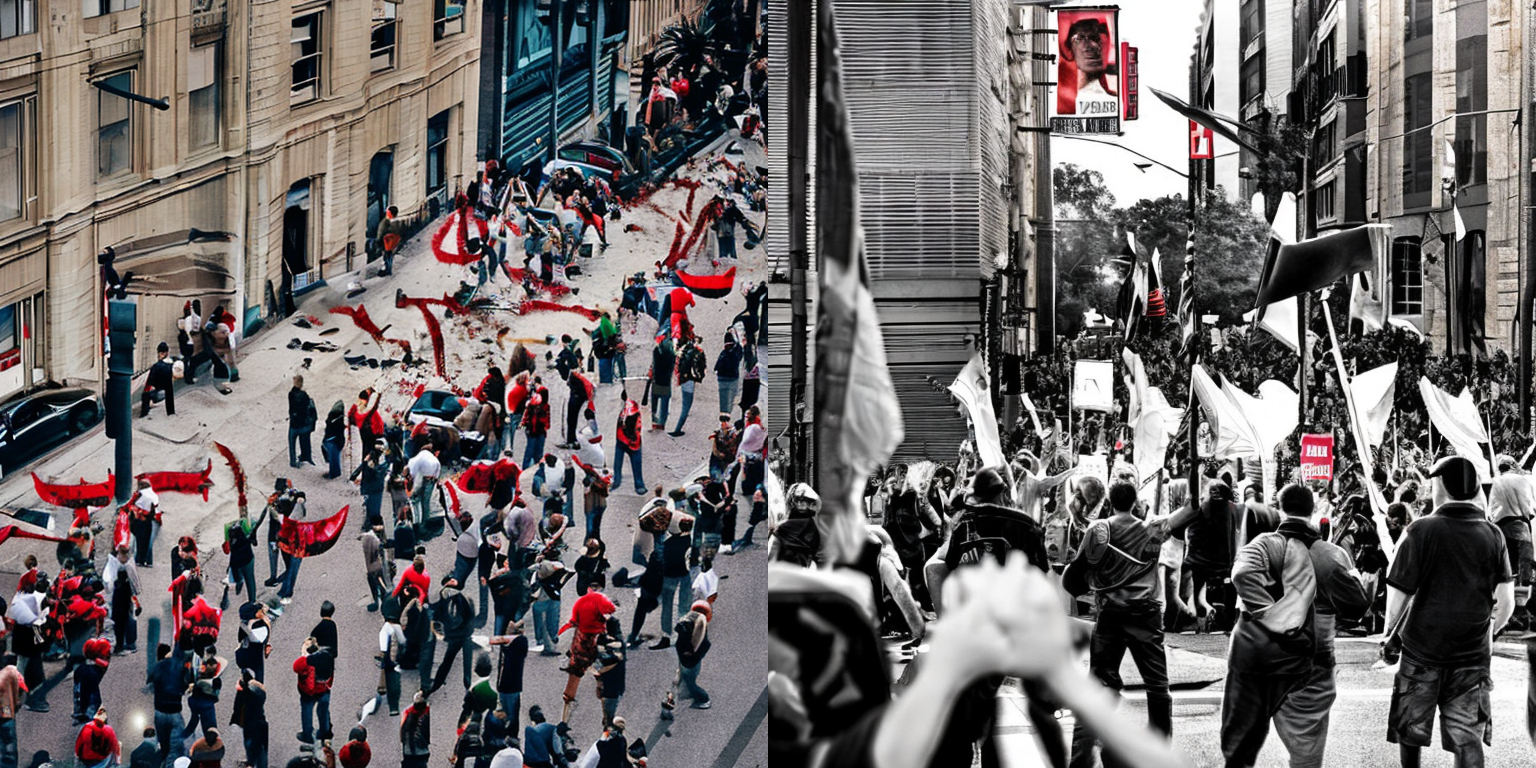

In [ ]:
num_cols = 2
num_rows = 1

prompt = ["Ultrarealistic photo of violent left wing protest in the streets in very high quality. award winning photography, masterpiece, rim lit"]
prompt = prompt * num_cols

all_images = []
for i in range(num_rows):
  images = pipeline_image_generation(prompt).images
  all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid

### 2.2.2 Image inpainting

In [ ]:
# based on https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/in_painting_with_stable_diffusion_using_diffusers.ipynb#scrollTo=mgCBtC7luTmk
import torch
import PIL
from diffusers import StableDiffusionInpaintPipeline

In [ ]:
# need to login with Hugging Face account token for this. You get a token with a free Hugging Face Account
#from huggingface_hub import notebook_login
#notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


In [ ]:
model_path = "stabilityai/stable-diffusion-2-inpainting"  #"runwayml/stable-diffusion-inpainting"
pipeline_inpainting = StableDiffusionInpaintPipeline.from_pretrained(model_path, revision="fp16", torch_dtype=torch.float16, use_auth_token=False).to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")



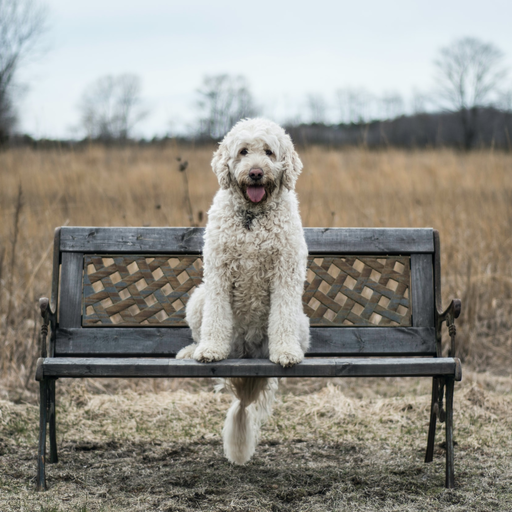

In [ ]:
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"
image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))
image

In [ ]:
prompt = "a mecha robot sitting on a bench"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(42) # change the seed to get different results

images = pipeline_inpainting(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# insert initial image in the list so we can compare side by side
images.insert(0, image)

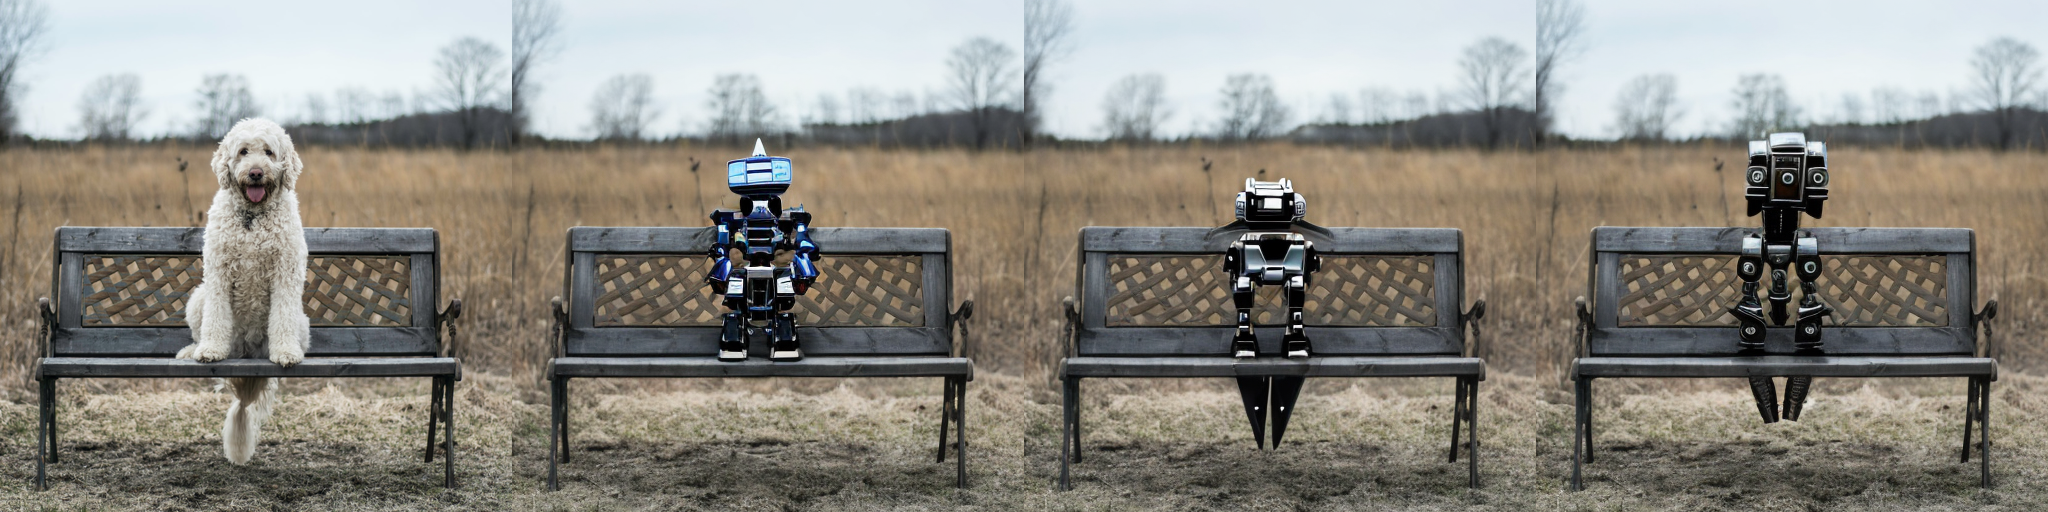

In [ ]:
image_grid(images, 1, num_samples + 1)

## 3. Q&A and discussion

**3.1. Questions**




---

